In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from loader.TrainValLoader import train_val_loader
from loader.CSVLoader import csv_loader
from loader.TestLoader import test_loader


all_data_test = test_loader()

gt,wave = csv_loader()
all_data = train_val_loader()


### Obliczanie podstawowych statystyk
min, max, median, średnia, średnia wielkość patcha, patche z różnym maskowaniem

In [3]:
print(gt["P"].min(),gt["P"].max(),gt["P"].median(),gt["P"].mean(),gt["P"].std())
print(gt["K"].min(),gt["K"].max(),gt["K"].median(),gt["K"].mean(),gt["K"].std())
print(gt["Mg"].min(),gt["Mg"].max(),gt["Mg"].median(),gt["Mg"].mean(),gt["Mg"].std())
print(gt["pH"].min(),gt["pH"].max(),gt["pH"].median(),gt["pH"].mean(),gt["pH"].std())

shapes_x = []
shapes_y = []
for image in all_data:
    shapes_x.append(image.shape[1])
    shapes_y.append(image.shape[2])
shapes_x = np.array(shapes_x)
shapes_y = np.array(shapes_y)
print(shapes_x.mean())
print(shapes_y.mean())

shapes_x = []
shapes_y = []
for image in all_data_test:
    shapes_x.append(image.shape[1])
    shapes_y.append(image.shape[2])
shapes_x = np.array(shapes_x)
shapes_y = np.array(shapes_y)
print(shapes_x.mean())
print(shapes_y.mean())

20.3 325.0 65.1 70.3026558891455 29.504784323363126
21.1 625.0 216.0 227.9885103926097 61.89198946643807
26.8 400.0 155.0 159.28123556581986 39.87182917173044
5.6 7.8 6.8 6.782719399538106 0.2602981133532027
58.103348729792145
58.941108545034645
57.79289428076257
59.62738301559792


### Podgląd

In [4]:
from matplotlib.font_manager import FontProperties


font_prop = FontProperties(family='times new roman', size=30)
axis_prop = FontProperties(family='times new roman', size=20)

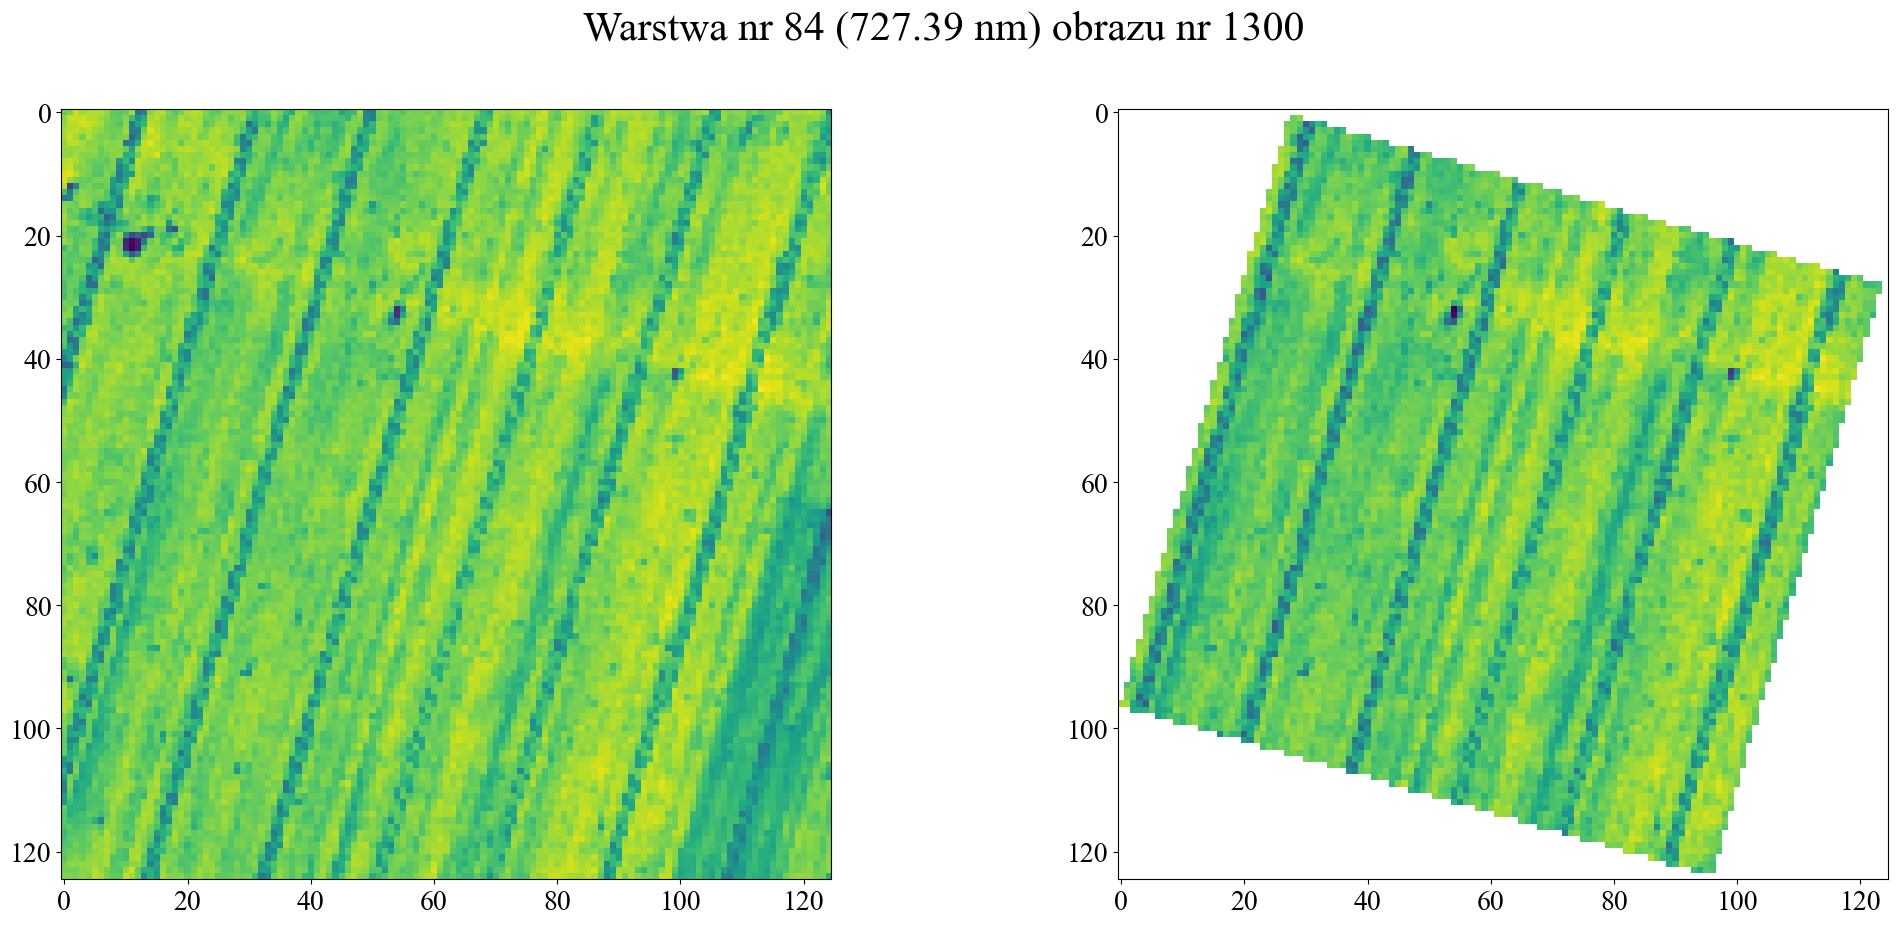

In [5]:
from matplotlib import pyplot as plt


fig = plt.figure(figsize=(25,10))
fig.suptitle("Warstwa nr 84 (727.39 nm) obrazu nr 1300",fontproperties=font_prop)
plt.subplot(1,2,1)
plt.yticks(fontproperties=axis_prop)
plt.xticks(fontproperties=axis_prop)
plt.imshow(all_data[1299][83,:,:].data)
plt.subplot(1,2,2)
plt.yticks(fontproperties=axis_prop)
plt.xticks(fontproperties=axis_prop)
plt.imshow(all_data[1299][83,:,:])

### Rozkład wielkości obrazów

Text(0.5, 1.0, 'b)')

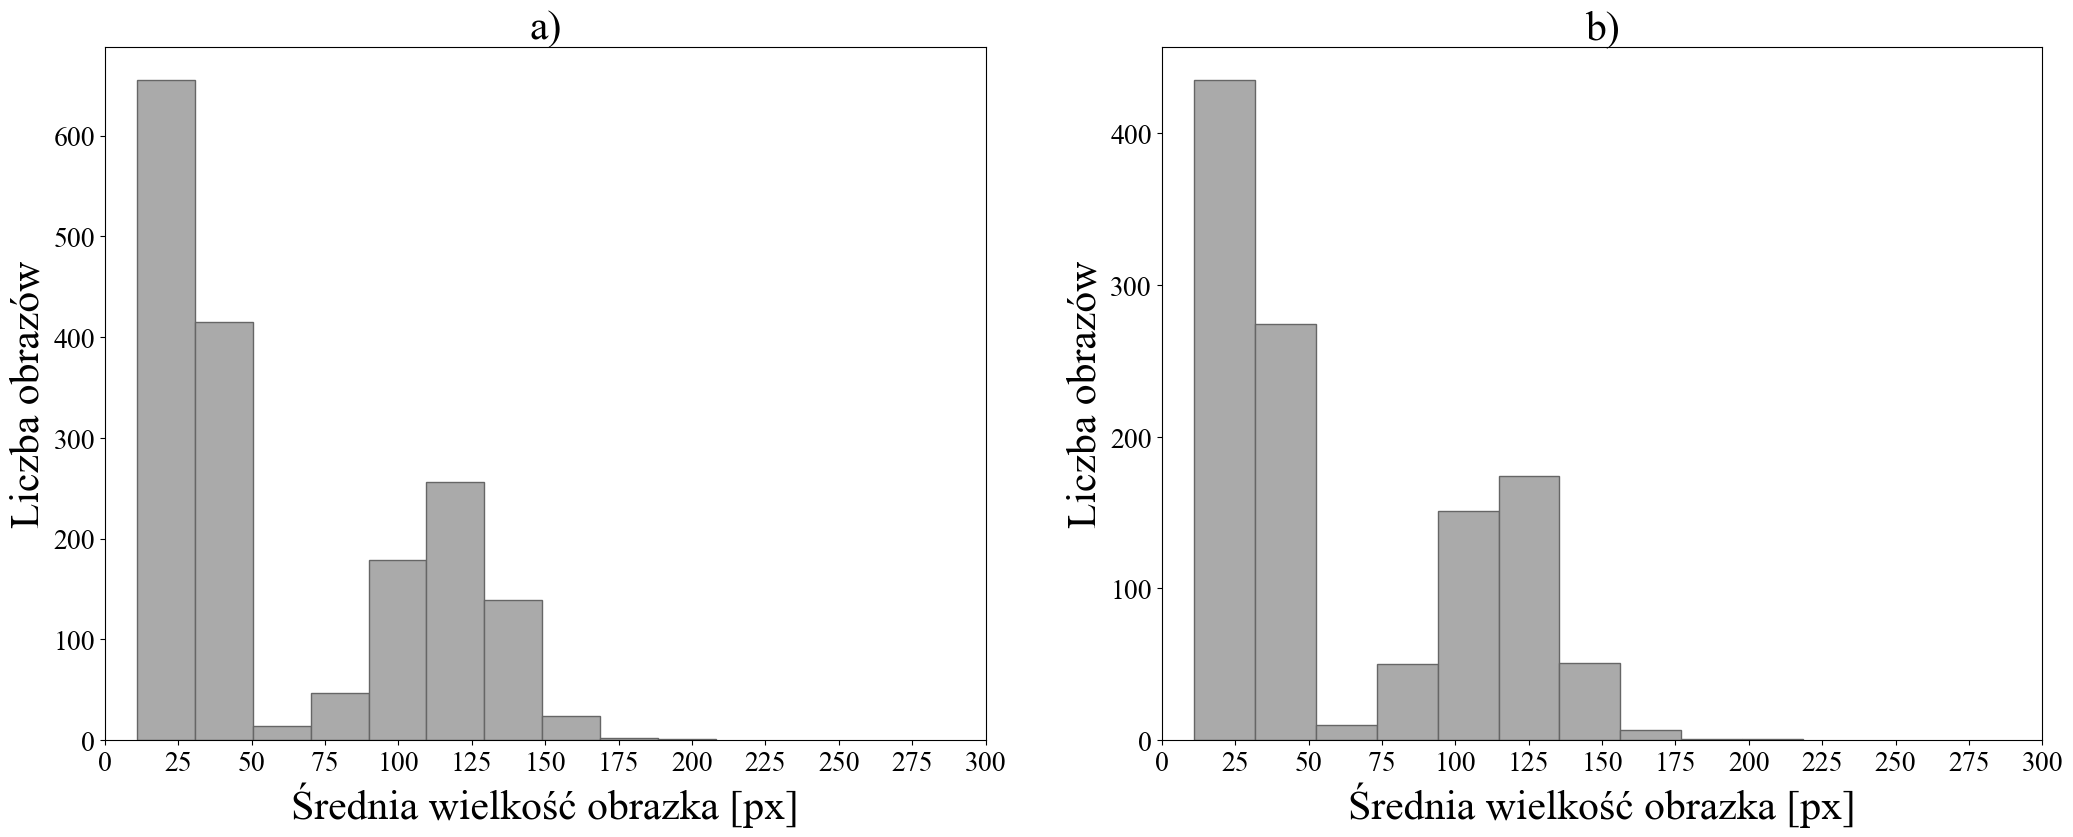

In [6]:
from matplotlib import pyplot as plt


shapes = []
for data in all_data:
    shapes.append((data.shape[1]+data.shape[2])/2)
shapes_test = []
for data in all_data_test:
    shapes_test.append((data.shape[1]+data.shape[2])/2)

fig = plt.figure(figsize=(25,9))
fig.add_subplot(1,2,1)
plt.xlabel("Średnia wielkość obrazka [px]",fontproperties=font_prop)
plt.ylabel("Liczba obrazów",fontproperties=font_prop)
plt.hist(shapes,edgecolor='#666',color="#aaa")
plt.xticks(range(0,325,25),fontproperties=axis_prop)
plt.yticks(fontproperties=axis_prop)
plt.title("a)",fontproperties=font_prop)
fig.add_subplot(1,2,2)
plt.hist(shapes_test,edgecolor='#666',color="#aaa")
plt.xlabel("Średnia wielkość obrazka [px]",fontproperties=font_prop)
plt.ylabel("Liczba obrazów",fontproperties=font_prop)
plt.xticks(range(0,325,25),fontproperties=axis_prop)
plt.yticks(fontproperties=axis_prop)
plt.title("b)",fontproperties=font_prop)

### Detekcja wartości odstających

In [7]:
from prep.ReducerBlocks import mean_1d_block

all_data_test1d = mean_1d_block(all_data_test)
all_data1d = mean_1d_block(all_data)
all_data1d.shape

(1732, 150)

In [8]:


outliers = set()
dataset_to_analyse = all_data1d

for i in range(150):
    quartile1 = np.quantile(dataset_to_analyse[:,i],0.25)
    quartile3 = np.quantile(dataset_to_analyse[:,i],0.75)
    iqr = abs(quartile3-quartile1)
    bound_low = quartile1-iqr*1.5
    bound_high = quartile3+iqr*1.5
    elems = (dataset_to_analyse[:,i]>bound_high)|(bound_low>dataset_to_analyse[:,i])
    outliers = outliers | set(np.nonzero(elems)[0].tolist())

outliers = list(outliers)
outliers.sort()
print(len(outliers))
print(outliers)

75
[3, 36, 37, 38, 47, 50, 71, 77, 79, 83, 87, 123, 136, 138, 169, 173, 182, 193, 207, 220, 229, 235, 242, 247, 256, 258, 260, 262, 270, 277, 279, 285, 300, 301, 310, 312, 314, 327, 331, 332, 352, 355, 356, 357, 371, 373, 399, 400, 421, 422, 423, 424, 425, 437, 440, 446, 452, 460, 465, 476, 479, 517, 521, 525, 533, 546, 567, 581, 593, 599, 631, 1124, 1127, 1209, 1570]


### Współczynnik zmienności, średnia dla warstw, korelacja między kolejnymi warstwami

In [9]:


def calc_cor_to_next(d):
    cor = np.corrcoef(d.transpose((1,0)))
    cor_to_next = []
    for i in range(149):
        cor_to_next.append(cor[i,i+1])
    return cor_to_next
cor_to_next = calc_cor_to_next(all_data1d)
cor_to_next_test = calc_cor_to_next(all_data_test1d)

(array([ 400.,  500.,  600.,  700.,  800.,  900., 1000.]),
 [Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600'),
  Text(700.0, 0, '700'),
  Text(800.0, 0, '800'),
  Text(900.0, 0, '900'),
  Text(1000.0, 0, '1000')])

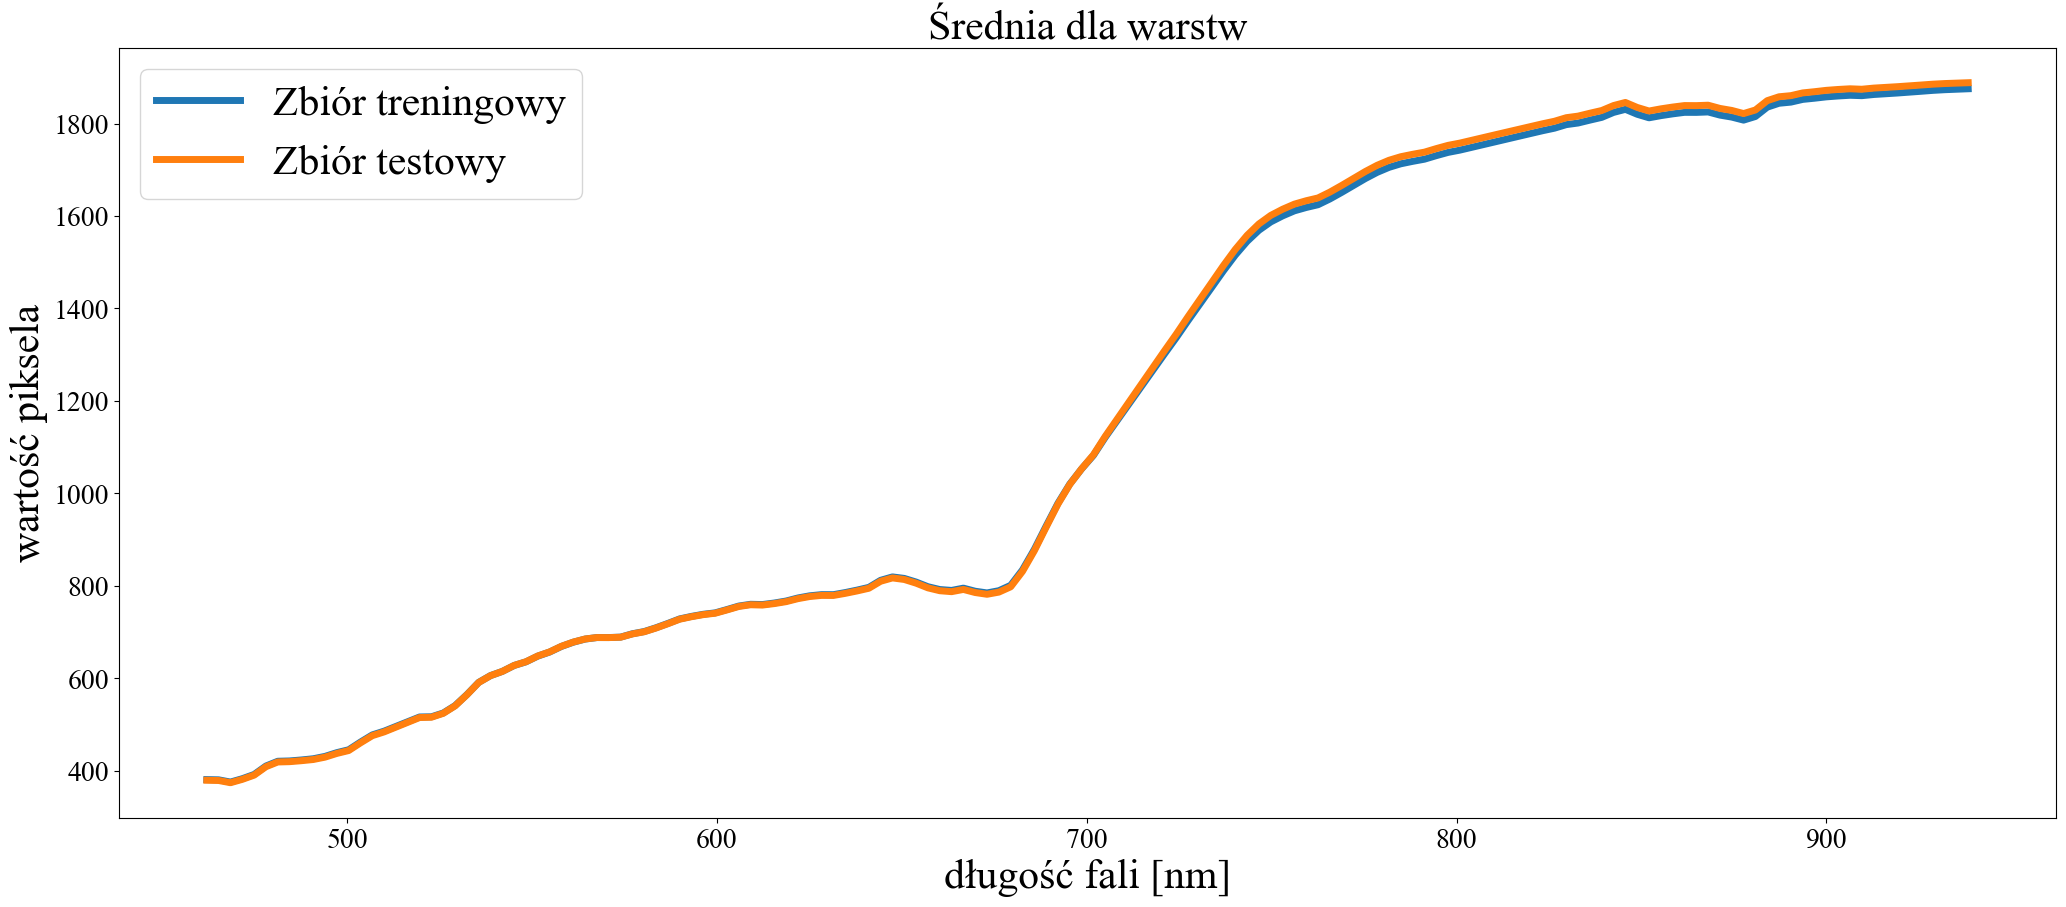

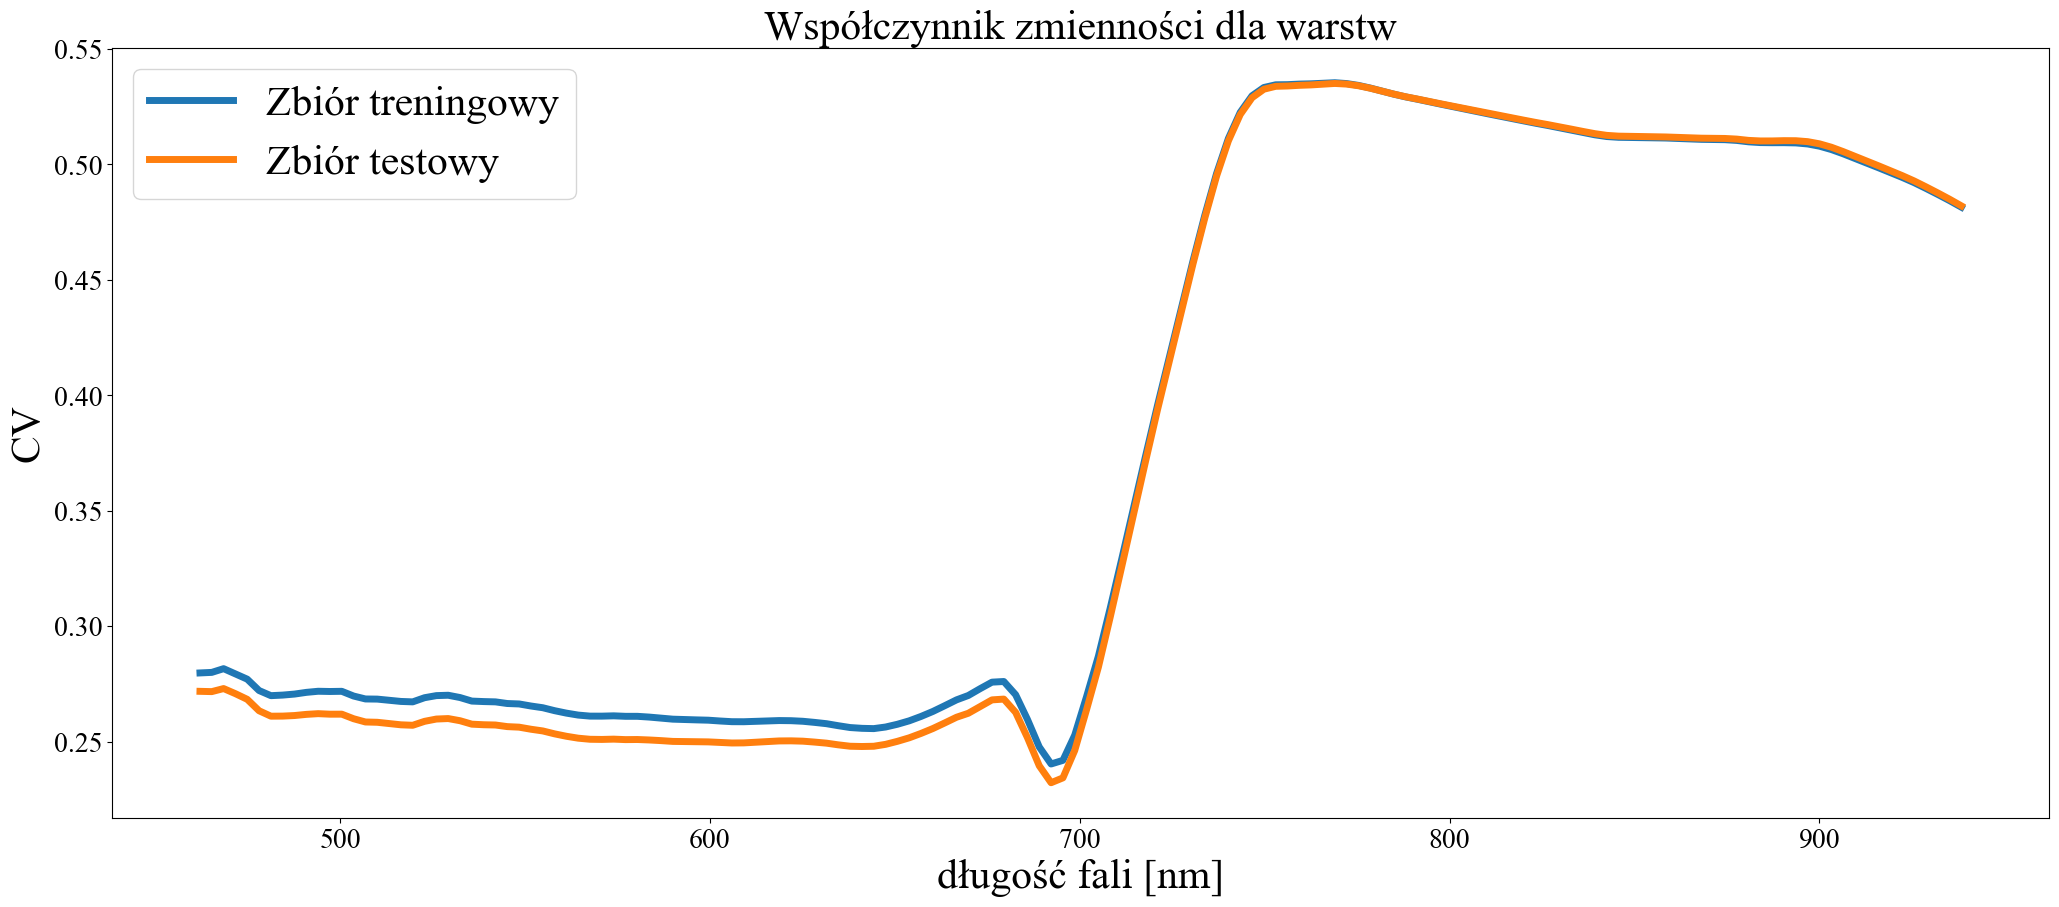

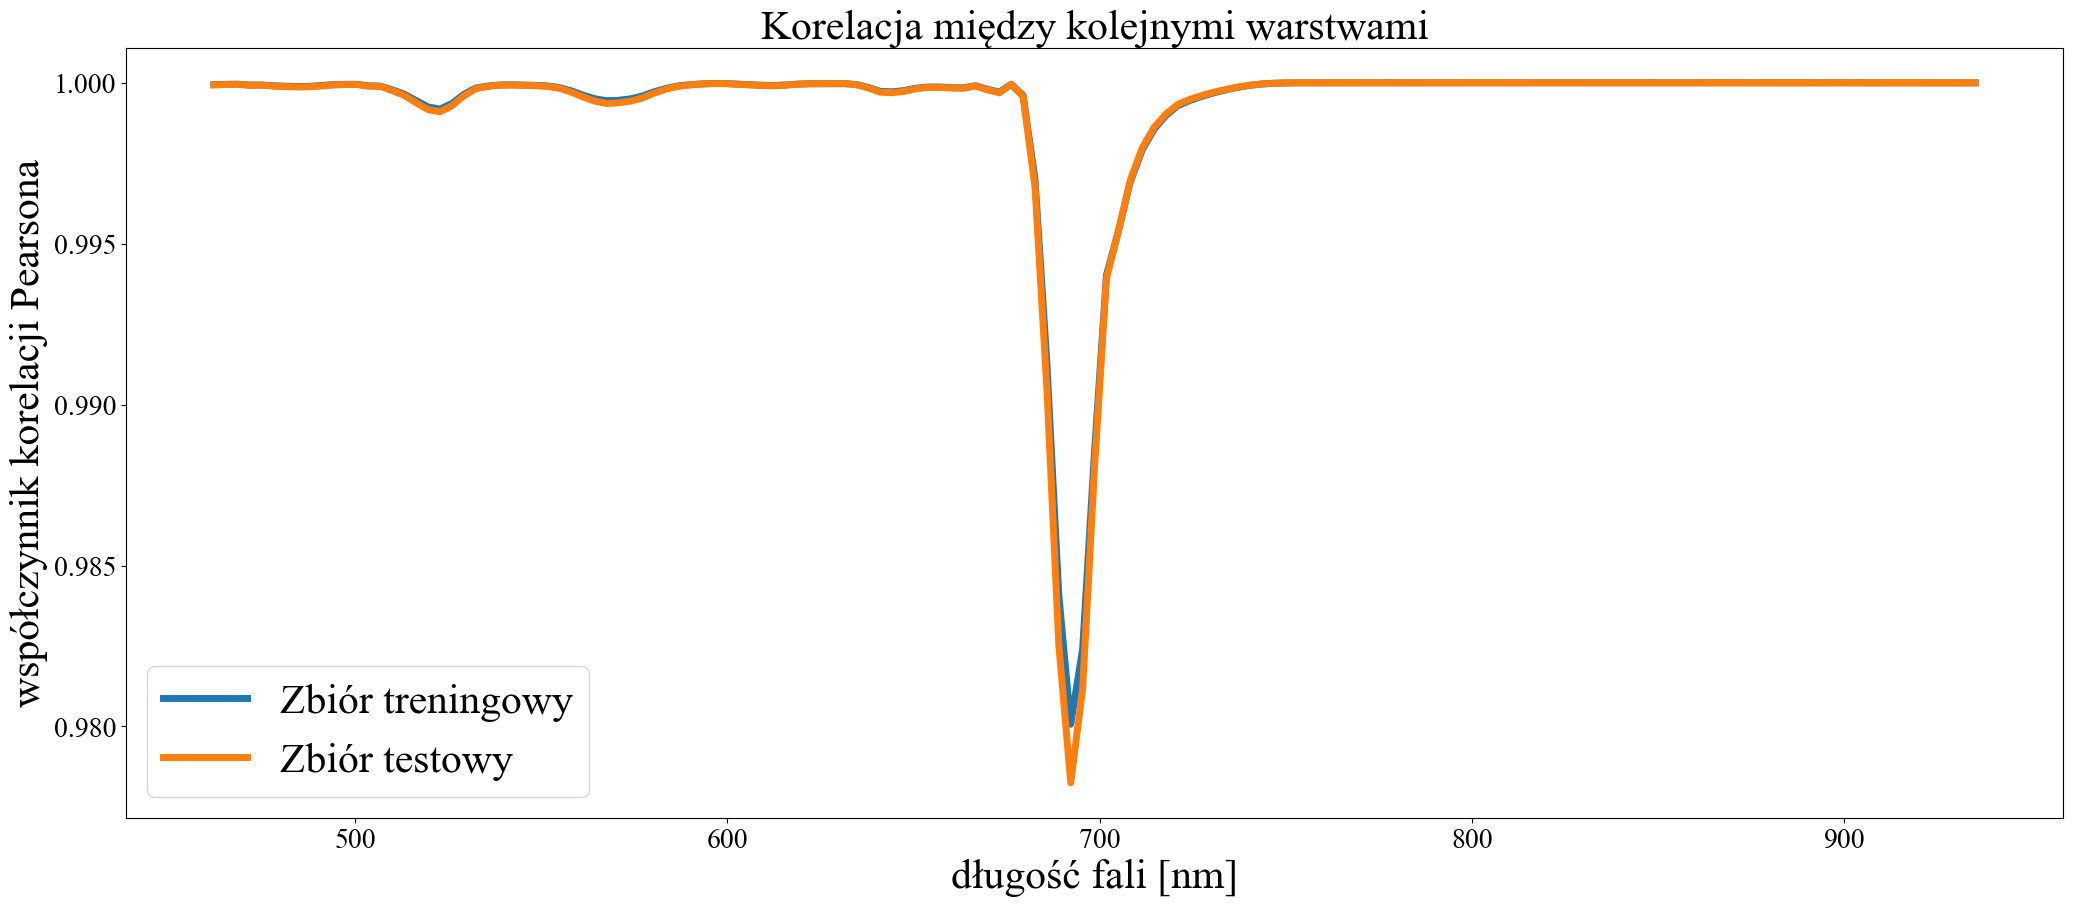

In [10]:
fig = plt.figure(figsize=(25,10))
plt.title("Średnia dla warstw",fontproperties=font_prop)
plt.plot(wave['wavelength'].values,all_data1d.mean(axis=0),label="Zbiór treningowy", linewidth=5)
plt.plot(wave['wavelength'].values,all_data_test1d.mean(axis=0), label="Zbiór testowy", linewidth=5)
plt.ylabel("wartość piksela",fontproperties=font_prop)
plt.xlabel("długość fali [nm]",fontproperties=font_prop)
plt.legend(prop=font_prop)
plt.yticks(fontproperties=axis_prop)
plt.xticks(fontproperties=axis_prop)

fig = plt.figure(figsize=(25,10))
plt.title("Współczynnik zmienności dla warstw",fontproperties=font_prop)
plt.ylabel("CV",fontproperties=font_prop)
plt.xlabel("długość fali [nm]",fontproperties=font_prop)
plt.plot(wave['wavelength'].values,all_data1d.std(axis=0)/all_data1d.mean(axis=0),label="Zbiór treningowy", linewidth=5)
plt.plot(wave['wavelength'].values,all_data_test1d.std(axis=0)/all_data_test1d.mean(axis=0), label="Zbiór testowy", linewidth=5)
plt.legend(prop=font_prop)
plt.yticks(fontproperties=axis_prop)
plt.xticks(fontproperties=axis_prop)

fig = plt.figure(figsize=(25,10))
plt.title("Korelacja między kolejnymi warstwami",fontproperties=font_prop)
plt.plot(wave['wavelength'].values[:-1],cor_to_next,label="Zbiór treningowy", linewidth=5)
plt.plot(wave['wavelength'].values[:-1],cor_to_next_test, label="Zbiór testowy", linewidth=5)
plt.ylabel("współczynnik korelacji Pearsona",fontproperties=font_prop)
plt.xlabel("długość fali [nm]",fontproperties=font_prop)
plt.legend(prop=font_prop)
plt.yticks(fontproperties=axis_prop)
plt.xticks(fontproperties=axis_prop)


### Zamaskowane wartości

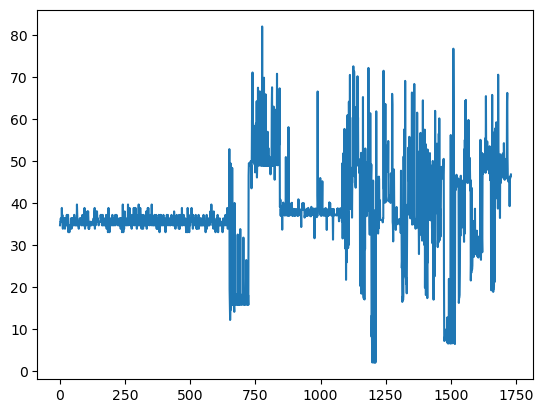

In [11]:
masked_perc = []
for sample in all_data:
    masked_perc.append((np.count_nonzero(sample.mask)/(sample.shape[0]*sample.shape[1]*sample.shape[2]))*100)
masked_perc = np.array(masked_perc)
plt.plot(masked_perc)

In [12]:
masked_sorted = masked_perc.argsort()

51.62778079218665


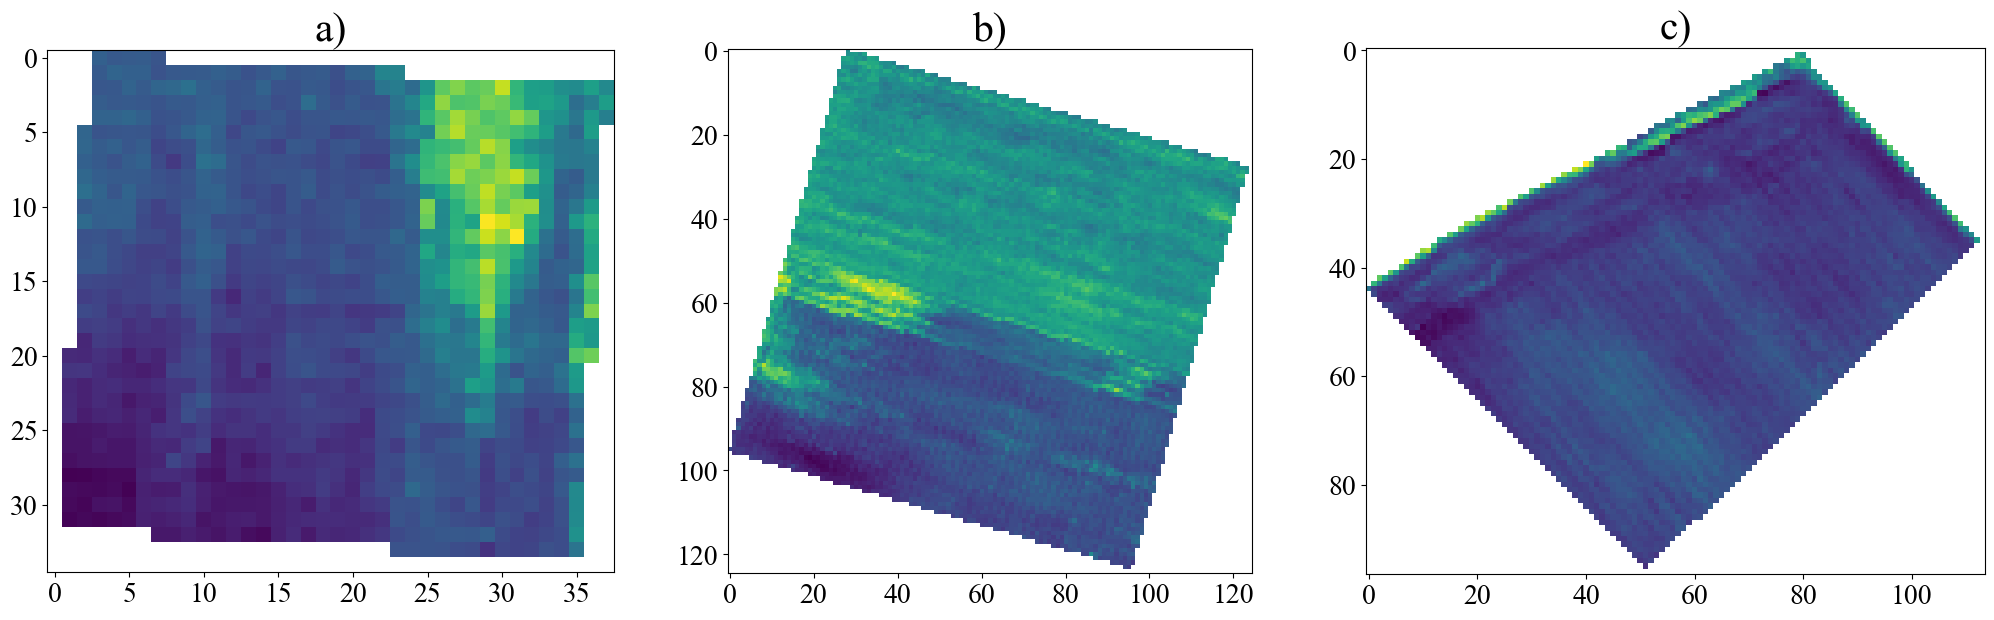

In [13]:

f, (a0, a1, a2) = plt.subplots(1, 3, gridspec_kw={'width_ratios': [54, 50,59]})
f.set_size_inches((25,10))
print(masked_perc[masked_sorted[1609]])
a0.imshow(all_data[masked_sorted[90]][50,:,:])
a0.set_title("a)",fontproperties=font_prop)
for label in a0.get_xticklabels():
    label.set_fontproperties(axis_prop)
for label in a0.get_yticklabels():
    label.set_fontproperties(axis_prop)
a1.imshow(all_data[masked_sorted[820]][50,:,:])
a1.set_title("b)",fontproperties=font_prop)
for label in a1.get_xticklabels():
    label.set_fontproperties(axis_prop)
for label in a1.get_yticklabels():
    label.set_fontproperties(axis_prop)
a2.imshow(all_data[masked_sorted[1609]][50,:,:])
a2.set_title("c)",fontproperties=font_prop)
for label in a2.get_xticklabels():
    label.set_fontproperties(axis_prop)
for label in a2.get_yticklabels():
    label.set_fontproperties(axis_prop)

### Analiza parametrów gleby
korelacja, boxplot


(array([5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 [Text(5.0, 0, '5.0'),
  Text(5.5, 0, '5.5'),
  Text(6.0, 0, '6.0'),
  Text(6.5, 0, '6.5'),
  Text(7.0, 0, '7.0'),
  Text(7.5, 0, '7.5'),
  Text(8.0, 0, '8.0')])

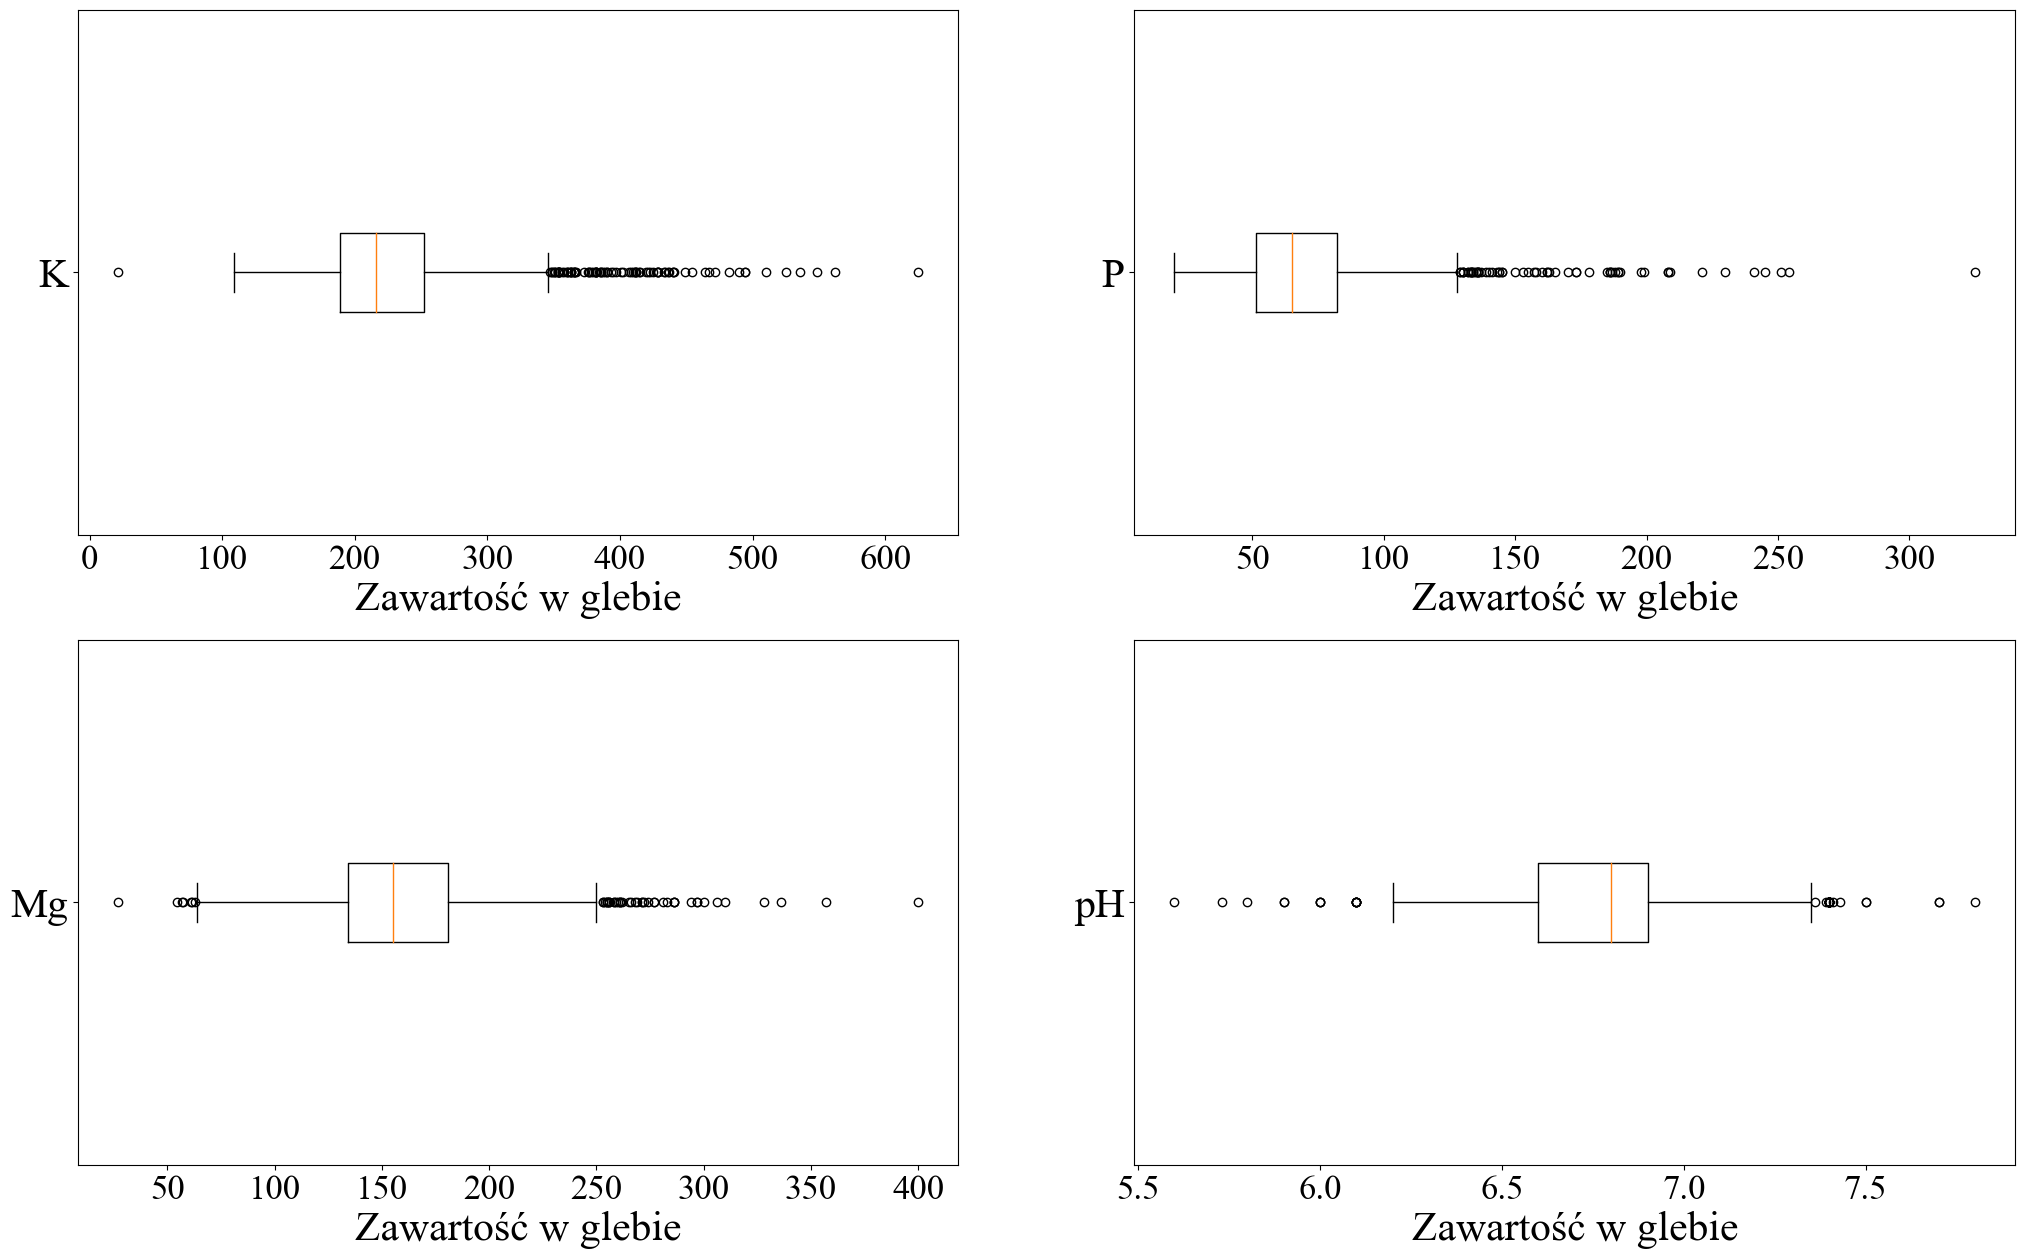

In [14]:
fig = plt.figure(figsize=(25,15))

axis_prop_boxplot = FontProperties(family='times new roman', size=25)


plt.subplot(2,2,1)
plt.boxplot(gt["K"],vert=False,labels=['K'])
plt.xlabel("Zawartość w glebie",fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.xticks(fontproperties=axis_prop_boxplot)

plt.subplot(2,2,2)
plt.boxplot(gt["P"],vert=False,labels=['P'])
plt.xlabel("Zawartość w glebie",fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.xticks(fontproperties=axis_prop_boxplot)

plt.subplot(2,2,3)
plt.boxplot(gt["Mg"],vert=False,labels=['Mg'])
plt.xlabel("Zawartość w glebie",fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.xticks(fontproperties=axis_prop_boxplot)

plt.subplot(2,2,4)
plt.boxplot(gt["pH"],vert=False,labels=['pH'])
plt.xlabel("Zawartość w glebie",fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.xticks(fontproperties=axis_prop_boxplot)

In [15]:
print(gt)
np.corrcoef(gt.drop('sample_index',axis=1).values.transpose((1,0)))

      sample_index     P      K     Mg   pH
0                0  45.1  188.0  179.0  7.2
1                1  44.8  205.0  188.0  7.0
2                2  44.4  207.0  145.0  6.8
3                3  46.5  204.0  143.0  6.8
4                4  52.0  212.0  167.0  6.7
...            ...   ...    ...    ...  ...
1727          1727  40.8  133.0  132.0  6.2
1728          1728  42.7  192.0  126.0  6.5
1729          1729  39.4  180.0  122.0  6.5
1730          1730  37.3  162.0  127.0  6.5
1731          1731  29.5  146.0  133.0  6.3

[1732 rows x 5 columns]


array([[ 1.        ,  0.41349407, -0.10303426,  0.12006662],
       [ 0.41349407,  1.        ,  0.23416241,  0.16879292],
       [-0.10303426,  0.23416241,  1.        ,  0.01097964],
       [ 0.12006662,  0.16879292,  0.01097964,  1.        ]])

### Wykres dla podsumowania

In [16]:
def make_k_fold_split(param, gt_df, all_data_spectral, percentiles):
    k_fold_data = []
    for i_th_fold in range(0, len(percentiles) - 1):
        gt_in_range_b = (gt_df[param] >= percentiles[i_th_fold]) & (
            gt_df[param] < percentiles[i_th_fold + 1]
        )
        gt_in_range = gt_df[gt_in_range_b]
        spectral_in_range = all_data_spectral[gt_in_range_b, :]
        spectral_mean = all_data_spectral[gt_in_range_b, :].mean(axis=0)
        k_fold_data.append(
            {
                "gt": gt_in_range,
                "spectral_all": spectral_in_range,
                "spectral_mean": spectral_mean,
            }
        )
    return k_fold_data

def calc_percentiles(elem):
    return [np.percentile(gt[elem].values,0),np.percentile(gt[elem].values,25),np.percentile(gt[elem].values,50),np.percentile(gt[elem].values,75),np.percentile(gt[elem].values,100)]

def display_spectrogram_k_fold_split(
    data_for_param, elementName, wavelength_df
):
    for index, fold in enumerate(data_for_param):
        plt.plot(
            wavelength_df["wavelength"],
            fold["spectral_mean"],
            label=f"Zbiór P{index}",
            c=(index * 0.7 / len(data_for_param) + 0.3, 0.3, 0.3),
            linewidth=4
        )
    plt.xlabel("długość fali [nm]",fontproperties=font_prop)
    plt.ylabel("zmierzona wartość",fontproperties=font_prop)
    plt.xticks(fontproperties=axis_prop)
    plt.yticks(fontproperties=axis_prop)
    plt.title(elementName,fontproperties=font_prop)
    plt.legend(prop=font_prop)

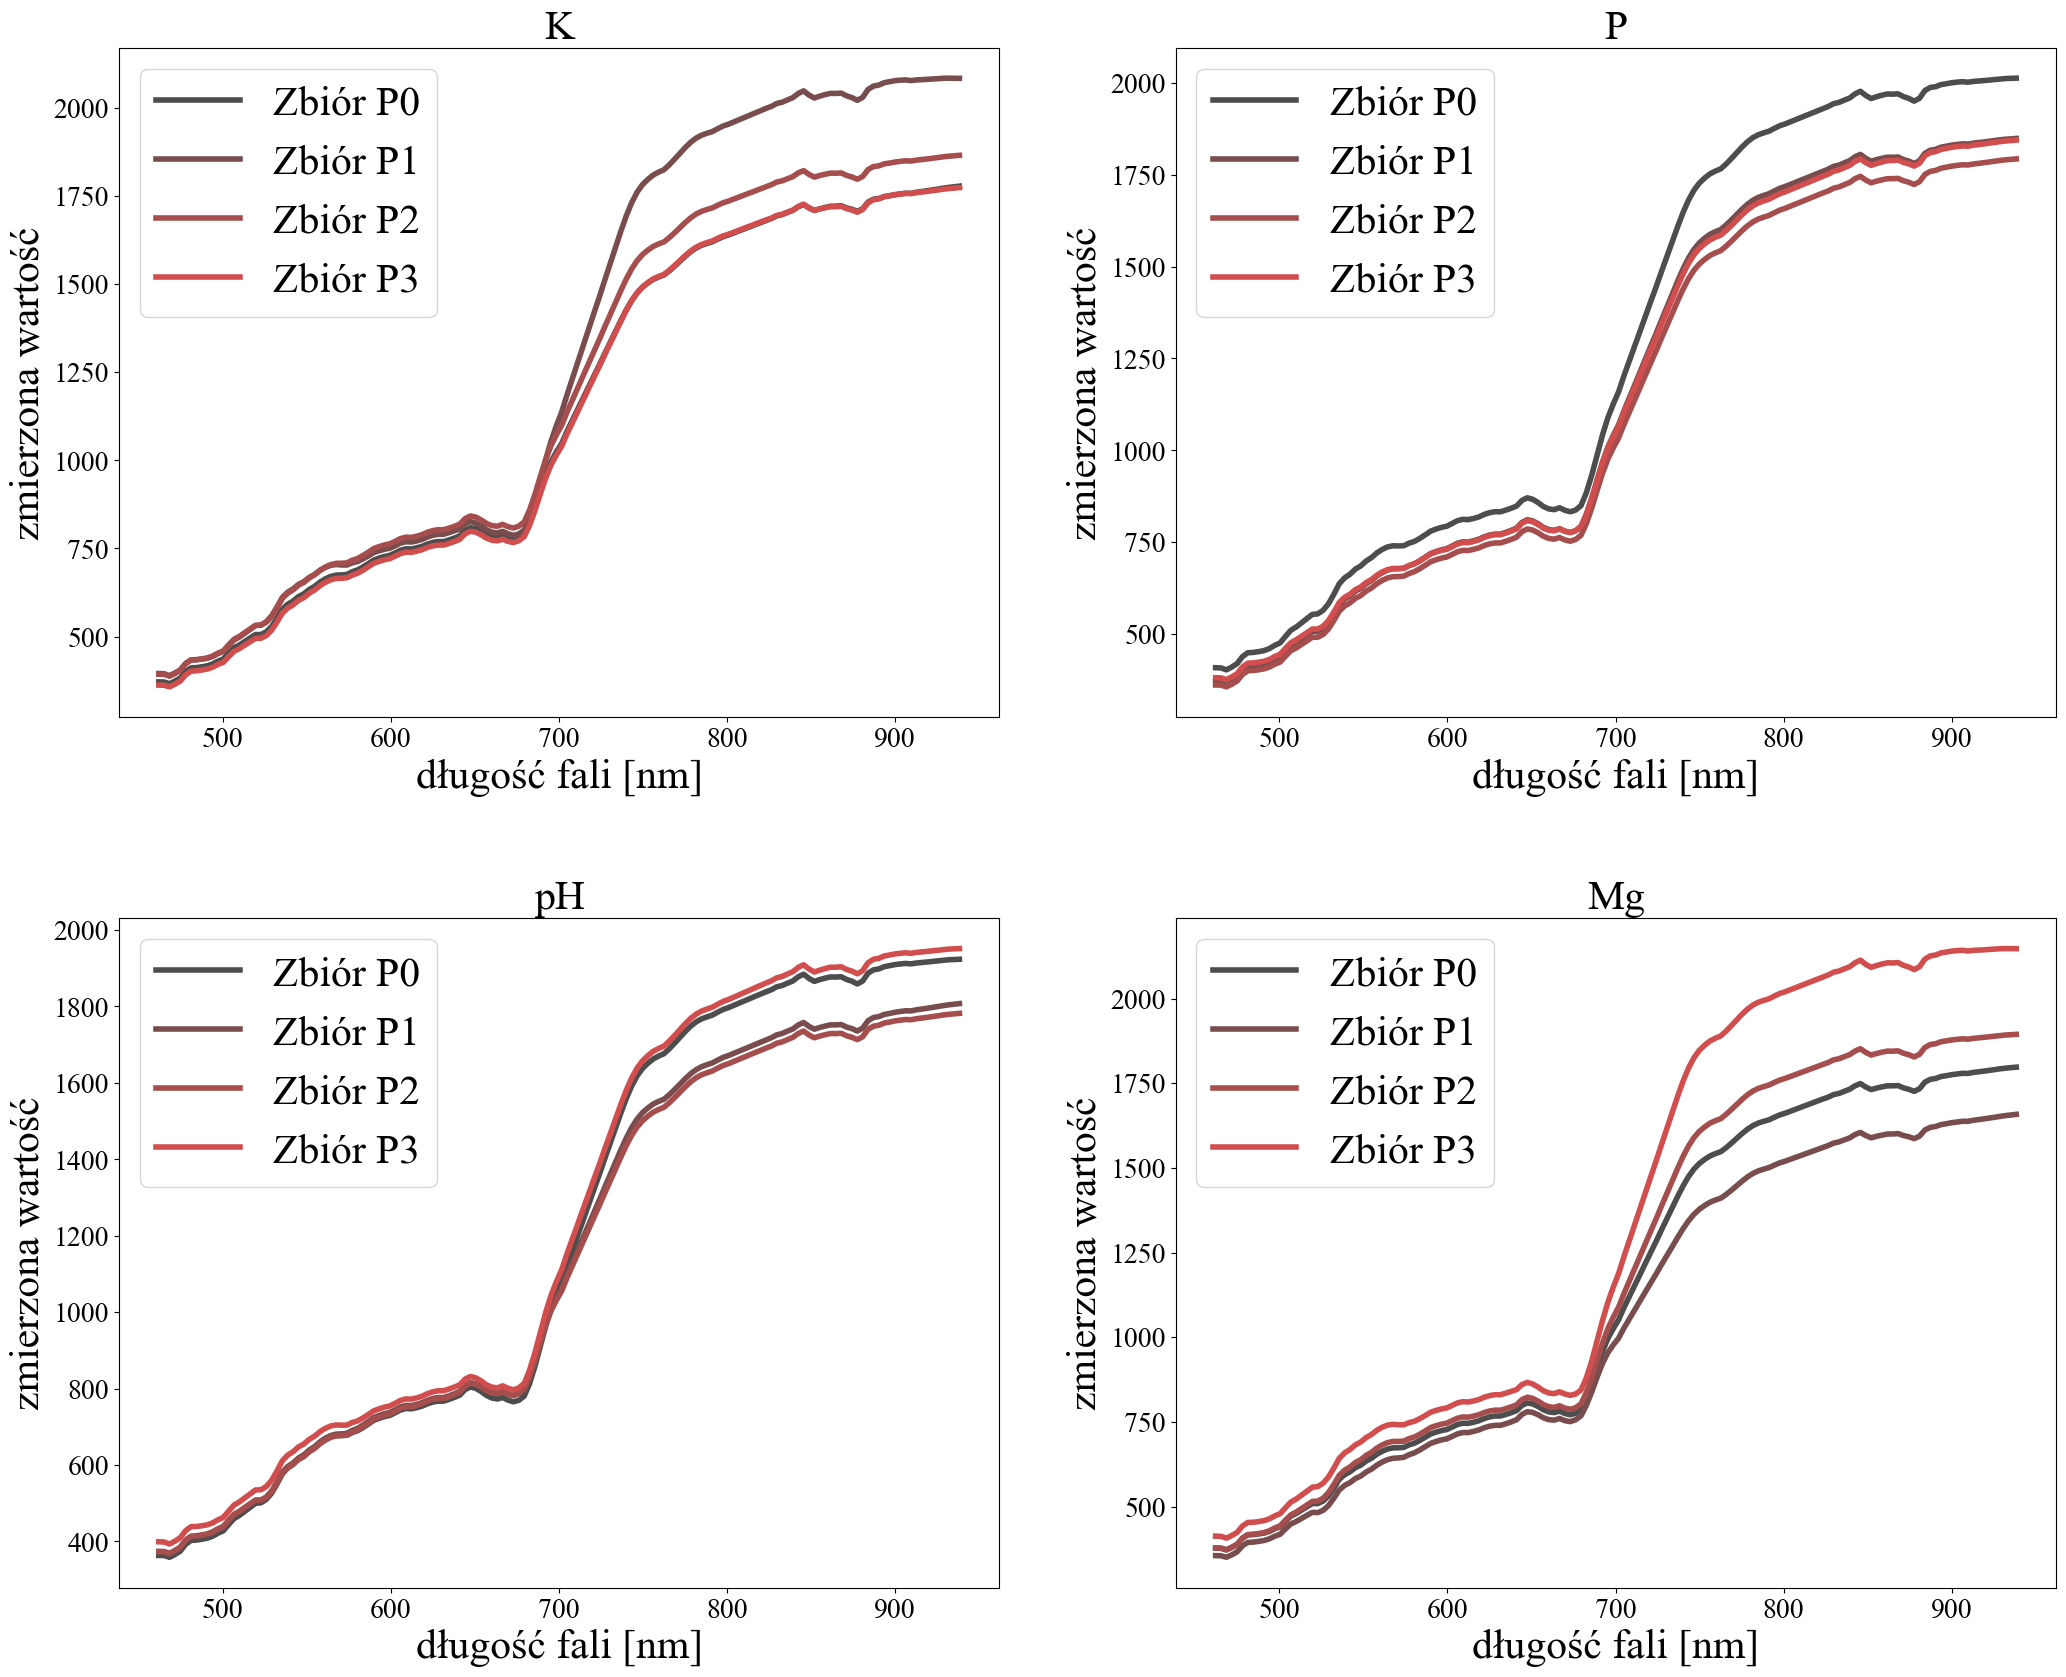

In [17]:
k_split = make_k_fold_split('K',gt,all_data1d,calc_percentiles('K'))
p_split = make_k_fold_split('P',gt,all_data1d,calc_percentiles('P'))
pH_split = make_k_fold_split('pH',gt,all_data1d,calc_percentiles('pH'))
mg_split = make_k_fold_split('Mg',gt,all_data1d,calc_percentiles('Mg'))

fig=plt.figure(figsize=(25,20))

plt.subplot(2,2,1)
display_spectrogram_k_fold_split(k_split,'K',wave)
plt.subplot(2,2,2)
display_spectrogram_k_fold_split(p_split,'P',wave)
plt.subplot(2,2,3)
display_spectrogram_k_fold_split(pH_split,'pH',wave)
plt.subplot(2,2,4)
display_spectrogram_k_fold_split(mg_split,'Mg',wave)
plt.subplots_adjust(hspace=0.3)

In [18]:
print(k_split[0]['gt']['P'].mean())
print(k_split[1]['gt']['P'].mean())
print(k_split[2]['gt']['P'].mean())
print(k_split[3]['gt']['P'].mean())

60.82695035460993
63.35127020785219
70.70568181818182
85.63632183908047


In [19]:
print(pH_split[0]['gt']['P'].mean())
print(pH_split[1]['gt']['P'].mean())
print(pH_split[2]['gt']['P'].mean())
print(pH_split[3]['gt']['P'].mean())

67.5794425087108
68.1020202020202
68.46262295081968
73.9554347826087


### Przykład Gauss, PCA, 

Text(0.5, 1.0, 'd)')

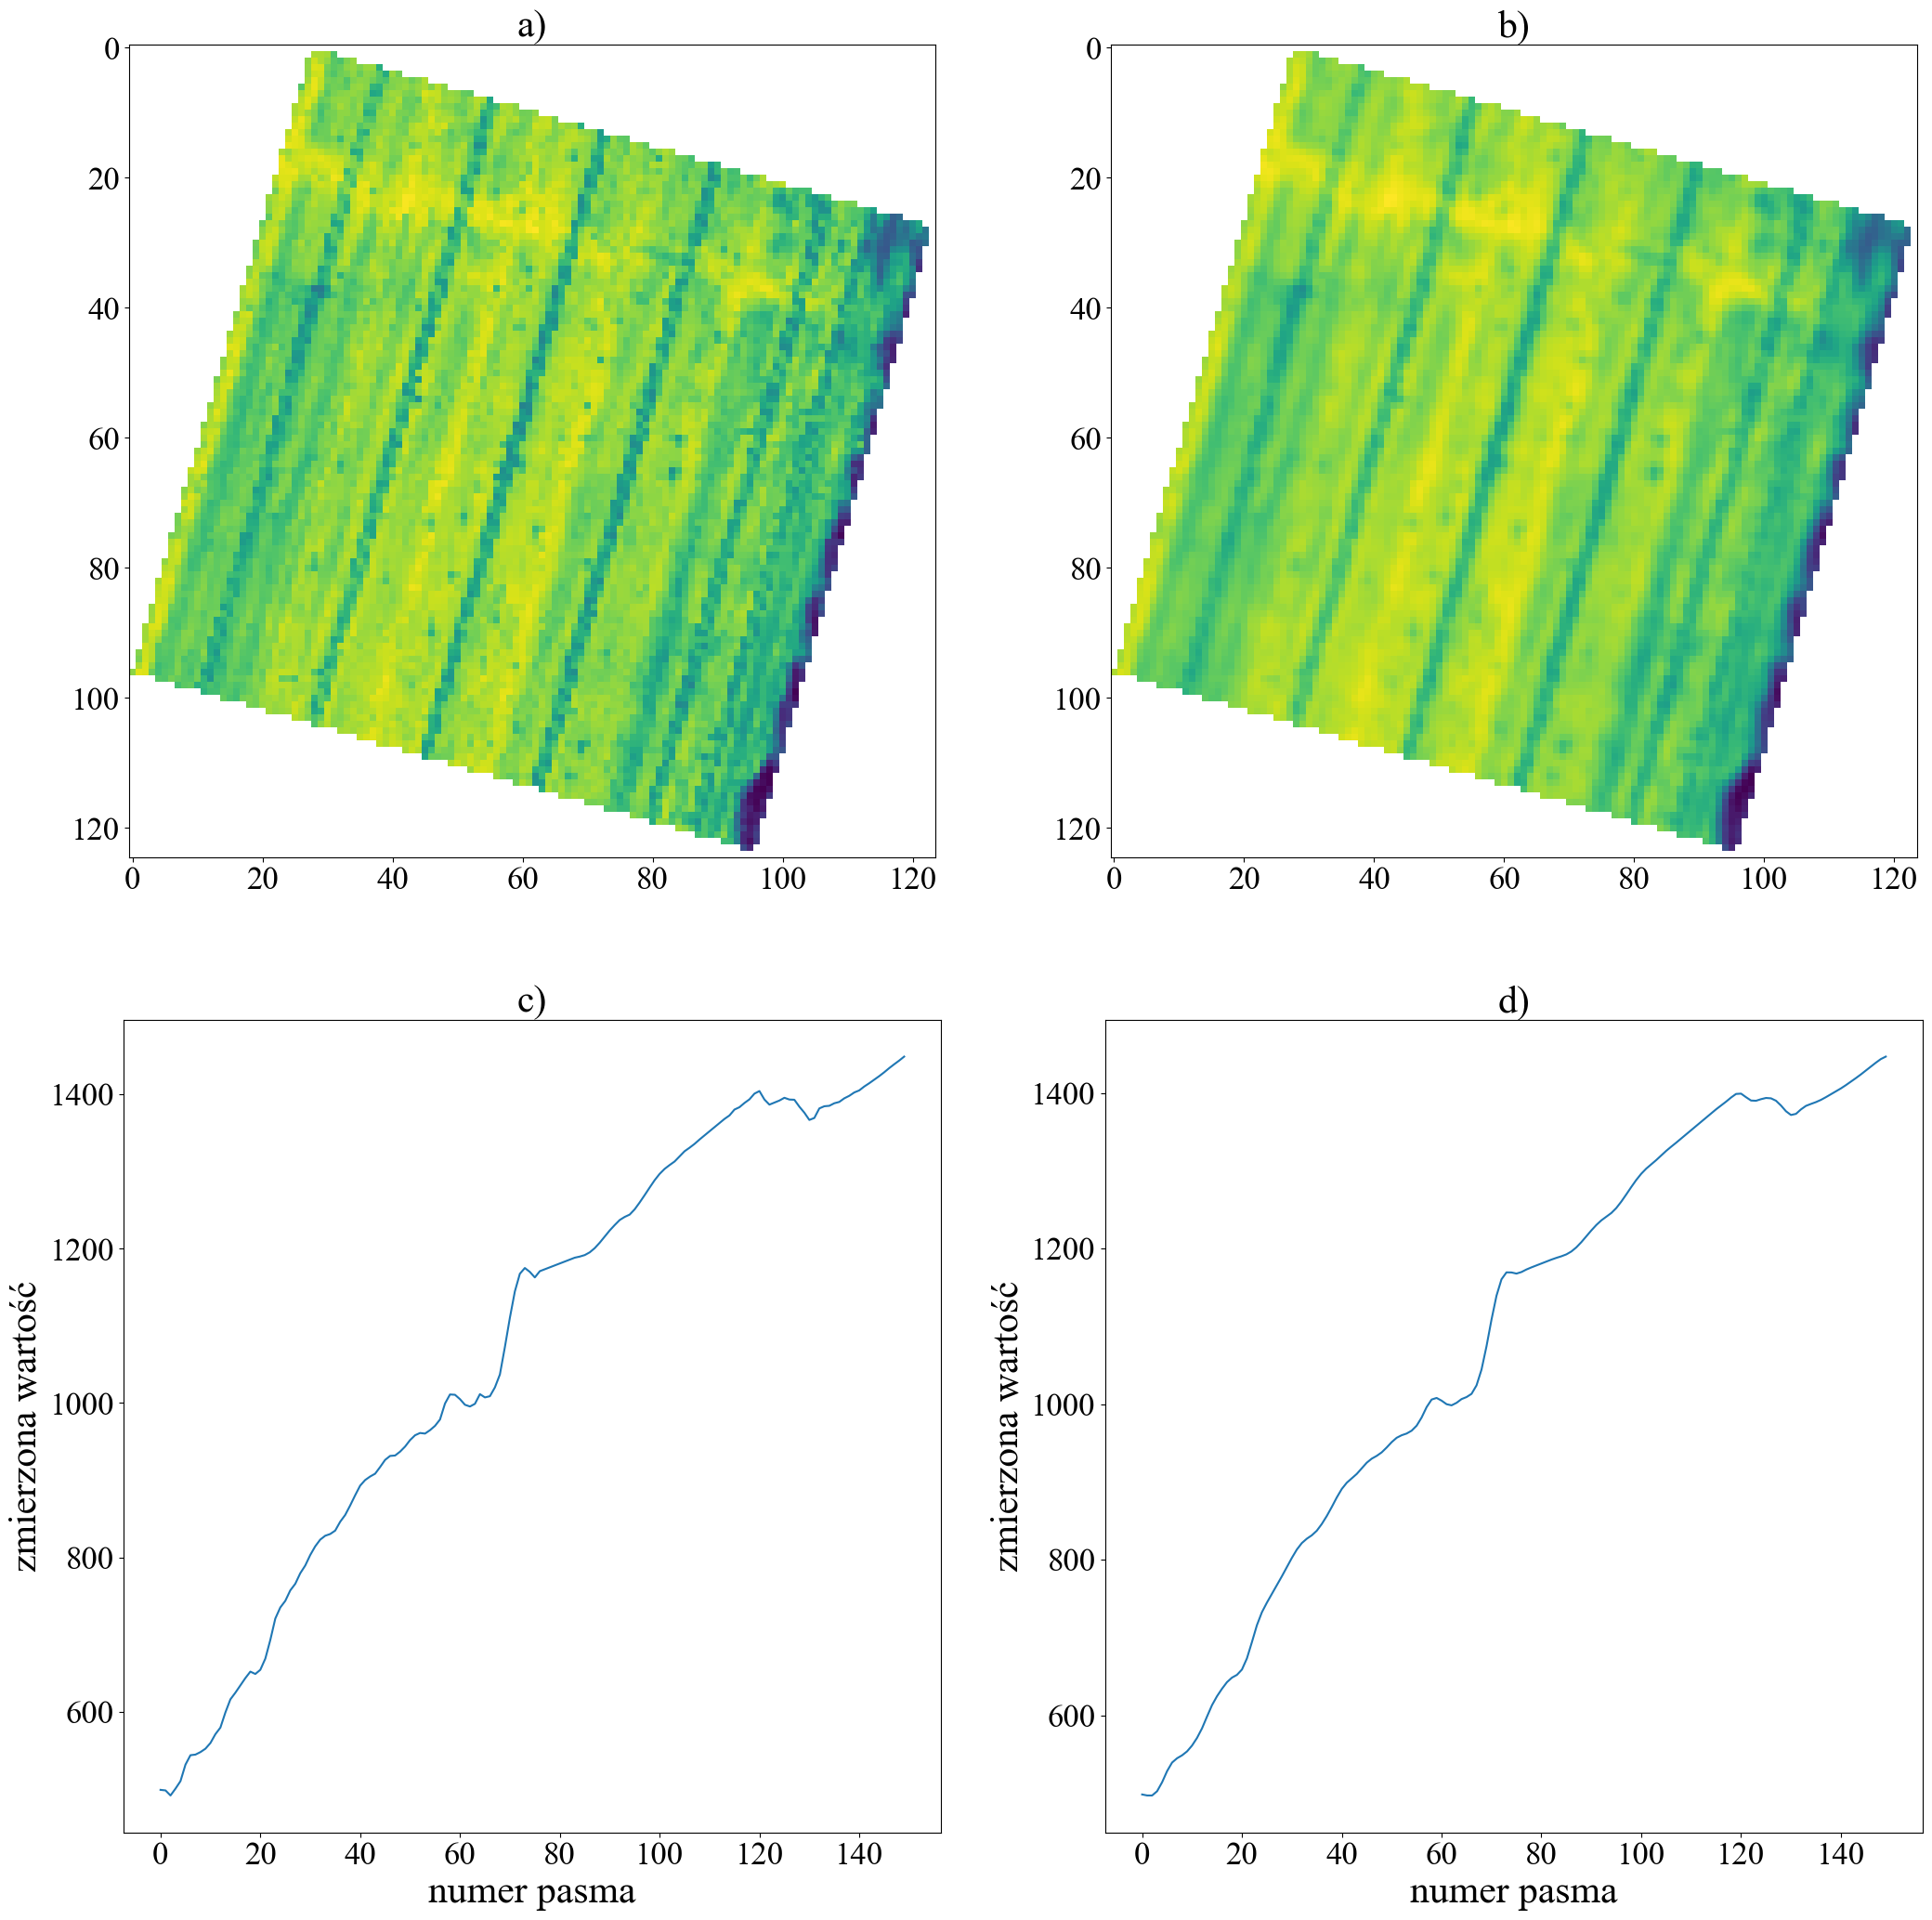

In [22]:
from prep.BM3DBlock import bm3d_block
from prep.GaussianBlock import gaussian_block, gaussian_block1d
from prep.PCABlock import pca_block

sample = all_data[1300]

plt.figure( figsize=(25,25))
plt.subplot(2,2,1)
plt.imshow(sample[90,:,:])
plt.xticks(fontproperties=axis_prop_boxplot)
plt.yticks(fontproperties=axis_prop_boxplot)
plt.title("a)",fontproperties=font_prop)

plt.subplot(2,2,2)

gauss_sample = gaussian_block(np.ma.array([sample], mask=[sample.mask]))

plt.imshow(gauss_sample[0,90,:,:])
plt.xticks(fontproperties=axis_prop_boxplot)
plt.yticks(fontproperties=axis_prop_boxplot)
plt.title("b)",fontproperties=font_prop)

plt.subplot(2,2,3)
plt.plot(all_data1d[90])
plt.xlabel("numer pasma",fontproperties=font_prop)
plt.ylabel("zmierzona wartość",fontproperties=font_prop)
plt.xticks(fontproperties=axis_prop_boxplot)
plt.yticks(fontproperties=axis_prop_boxplot)
plt.title("c)",fontproperties=font_prop)

plt.subplot(2,2,4)
gauss_sample = gaussian_block1d(all_data1d)


plt.plot(gauss_sample[90])
plt.xlabel("numer pasma",fontproperties=font_prop)
plt.ylabel("zmierzona wartość",fontproperties=font_prop)
plt.xticks(fontproperties=axis_prop_boxplot)
plt.yticks(fontproperties=axis_prop_boxplot)
plt.title("d)",fontproperties=font_prop)


